### Курсовой проект для курса "Python для Data Science"

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score as r2

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

plt.style.use('fivethirtyeight')

In [4]:
def evaluate_preds(true_values, pred_values):
    print("R2:\t" + str(round(r2(true_values, pred_values), 4)))
    
    plt.figure(figsize = (10,10))
    
    sns.scatterplot(x = pred_values, y = true_values)
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    plt.show()

In [5]:
# загрузка и знакомство с данными

data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

print(f"Train:\t{data_train.shape[0]}\t sales and {data_train.shape[1]} features")
print(f'Test:\t{data_test.shape[0]}\t sales and {data_test.shape[1]} features')

Train:	10000	 sales and 20 features
Test:	5000	 sales and 19 features


In [6]:
data_train.head()

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
0  14038          35    2.0  47.981561   29.442751            6.0      7   
1  15053          41    3.0  65.683640   40.049543            8.0      7   
2   4765          53    2.0  44.947953   29.197612            0.0      8   
3   5809          58    2.0  53.352981   52.731512            9.0      8   
4  10783          99    1.0  39.649192   23.776169            7.0     11   

   HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  Social_2  \
0         9.0       1969   0.089040         B         B        33      7976   
1         9.0       1978   0.000070         B         B        46     10309   
2        12.0       1968   0.049637         B         B        34      7759   
3        17.0       1977   0.437885         B         B        23      5735   
4        12.0       1976   0.012339         B         B        35      5776   

   Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2          Price  
0         5           NaN            0       11       B  184966.930730  
1         1         240.0            1       16       B  300009.450063  
2         0         229.0            1        3       B  220925.908524  
3         3        1084.0            0        5       B  175616.227217  
4         1        2078.0            2        4       B  150226.531644

In [7]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


In [8]:
data_test.head()

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
0    725          58    2.0  49.882643   33.432782            6.0      6   
1  15856          74    2.0  69.263183         NaN            1.0      6   
2   5480         190    1.0  13.597819   15.948246           12.0      2   
3  15664          47    2.0  73.046609   51.940842            9.0     22   
4  14275          27    1.0  47.527111   43.387569            1.0     17   

   HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  Social_2  \
0        14.0       1972   0.310199         B         B        11      2748   
1         1.0       1977   0.075779         B         B         6      1437   
2         5.0       1909   0.000000         B         B        30      7538   
3        22.0       2007   0.101872         B         B        23      4583   
4        17.0       2017   0.072158         B         B         2       629   

   Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  
0         1           NaN            0        0       B  
1         3           NaN            0        2       B  
2        87        4702.0            5        5       B  
3         3           NaN            3        3       B  
4         1           NaN            0        0       A

In [9]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       3959 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null object
Ecology_3        5000 non-null object
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     2623 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null object
dtypes: float64(7), int64(9), object(3)
memory usage: 742.3+ KB


In [10]:
# приведем тип данных
# проведем обзор данных

data_train['Rooms'] = data_train['Rooms'].astype('int64')
data_test['Rooms'] = data_test['Rooms'].astype('int64')

data_train['HouseFloor'] = data_train['HouseFloor'].astype('int64')
data_test['HouseFloor'] = data_test['HouseFloor'].astype('int64')

data_train['Id'] = data_train['Id'].astype(str)
data_test['Id'] = data_test['Id'].astype(str)

data_train.describe()

DistrictId         Rooms        Square   LifeSquare  KitchenSquare  \
count  10000.000000  10000.000000  10000.000000  7887.000000   10000.000000   
mean      50.400800      1.890500     56.315775    37.199645       6.273300   
std       43.587592      0.839512     21.058732    86.241209      28.560917   
min        0.000000      0.000000      1.136859     0.370619       0.000000   
25%       20.000000      1.000000     41.774881    22.769832       1.000000   
50%       36.000000      2.000000     52.513310    32.781260       6.000000   
75%       75.000000      2.000000     65.900625    45.128803       9.000000   
max      209.000000     19.000000    641.065193  7480.592129    2014.000000   

              Floor    HouseFloor     HouseYear     Ecology_1      Social_1  \
count  10000.000000  10000.000000  1.000000e+04  10000.000000  10000.000000   
mean       8.526700     12.609400  3.990166e+03      0.118858     24.687000   
std        5.241148      6.775974  2.005003e+05      0.119025     17.532614   
min        1.000000      0.000000  1.910000e+03      0.000000      0.000000   
25%        4.000000      9.000000  1.974000e+03      0.017647      6.000000   
50%        7.000000     13.000000  1.977000e+03      0.075424     25.000000   
75%       12.000000     17.000000  2.001000e+03      0.195781     36.000000   
max       42.000000    117.000000  2.005201e+07      0.521867     74.000000   

           Social_2      Social_3  Healthcare_1   Helthcare_2       Shops_1  \
count  10000.000000  10000.000000   5202.000000  10000.000000  10000.000000   
mean    5352.157400      8.039200   1142.904460      1.319500      4.231300   
std     4006.799803     23.831875   1021.517264      1.493601      4.806341   
min      168.000000      0.000000      0.000000      0.000000      0.000000   
25%     1564.000000      0.000000    350.000000      0.000000      1.000000   
50%     5285.000000      2.000000    900.000000      1.000000      3.000000   
75%     7227.000000      5.000000   1548.000000      2.000000      6.000000   
max    19083.000000    141.000000   4849.000000      6.000000     23.000000   

               Price  
count   10000.000000  
mean   214138.857399  
std     92872.293865  
min     59174.778028  
25%    153872.633942  
50%    192269.644879  
75%    249135.462171  
max    633233.466570

In [11]:
data_train['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [12]:
data_train['Ecology_3'].value_counts()

B    9725
A     275
Name: Ecology_3, dtype: int64

In [13]:
data_train['Shops_2'].value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

In [123]:
# проведем минимальную чистку и предобработку данных

cleared_data = data_train.fillna(0)

X = cleared_data.drop(labels = ['Id', 'Price'], axis = 1)
X = pd.get_dummies(data = X, columns = ['Ecology_2', 'Ecology_3', 'Shops_2'], drop_first = True)
y = cleared_data['Price'].values

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

rf_model = RandomForestRegressor(random_state = 42)
rf_model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

R2:	0.9453


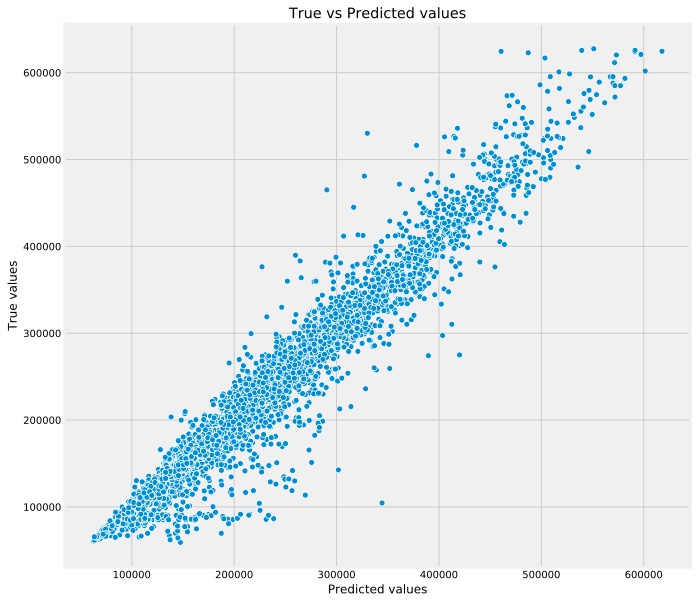

In [124]:
y_pred_train = rf_model.predict(X_train)
evaluate_preds(y_train.flatten(), y_pred_train.flatten())

R2:	0.6843


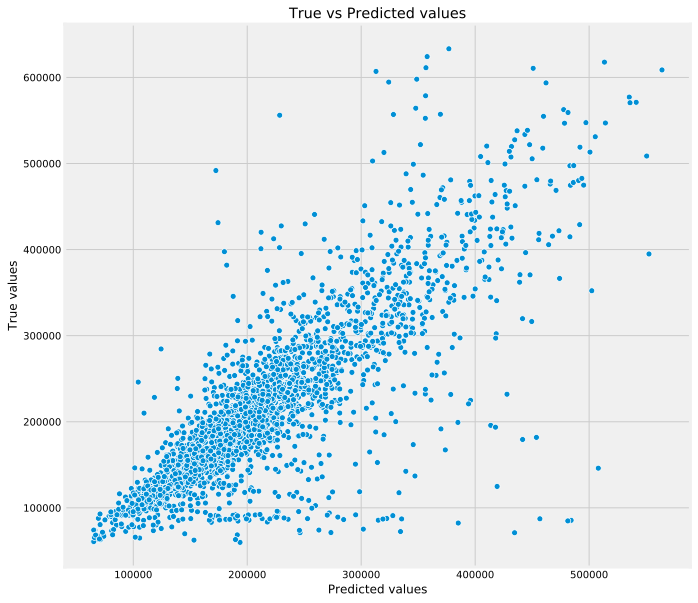

In [126]:
y_pred_valid = rf_model.predict(X_valid)
evaluate_preds(y_valid.flatten(), y_pred_valid.flatten())

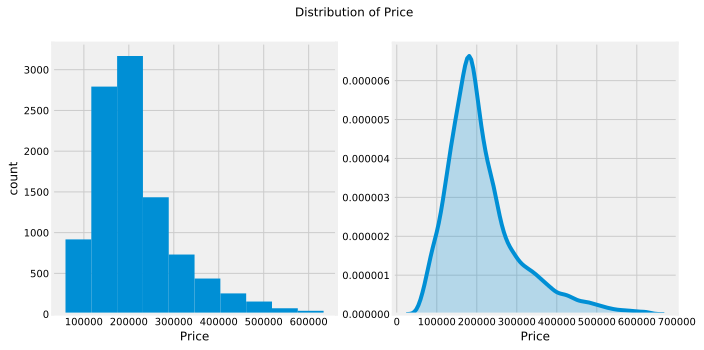

In [131]:
# анализ целевой переменной

plt.figure(figsize = (10, 5))

plt.subplot(121)
data_train['Price'].hist()
plt.ylabel('count')
plt.xlabel('Price')

plt.subplot(122)
sns.kdeplot(data_train['Price'], shade=True, legend=False)
plt.xlabel('Price')

plt.suptitle('Distribution of Price')
plt.show()

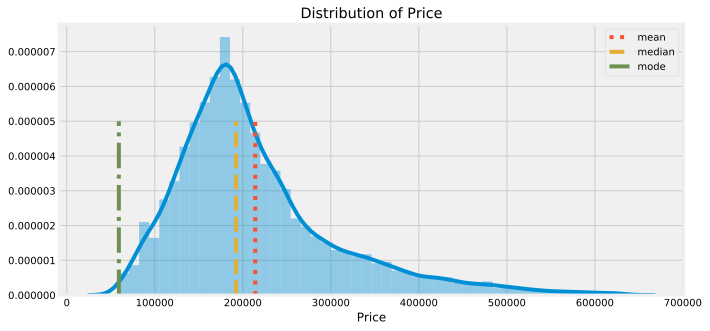

In [132]:
target_mean = round(data_train['Price'].mean(), 2)
target_median = data_train['Price'].median()
target_mode = data_train['Price'].mode()[0]

plt.figure(figsize = (10, 5))

sns.distplot(data_train['Price'])

y = np.linspace(0, 0.000005, 100)
plt.plot([target_mean] * 100, y, label = 'mean', linestyle = ':', linewidth = 4)
plt.plot([target_median] * 100, y, label = 'median', linestyle = '--', linewidth = 4)
plt.plot([target_mode] * 100, y, label = 'mode', linestyle = '-.', linewidth = 4)

plt.title('Distribution of Price')
plt.legend()
plt.show()

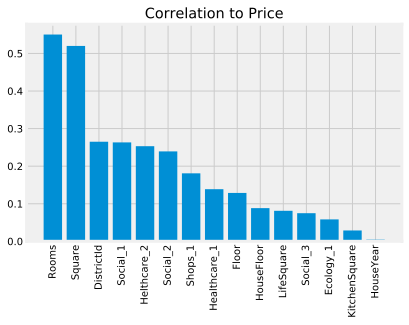

In [133]:
corrmat = data_train.loc[:, data_train.columns != 'Id'].corrwith(
    data_train['Price']).abs().sort_values(ascending = False)[1:]
plt.bar(corrmat.index, corrmat.values)
plt.title('Correlation to Price')
plt.xticks(rotation = 'vertical')
plt.show()

### Проверка и корректировка данных

In [134]:
data_train[data_train['Rooms'] > 6]

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
377    5927          57     10  59.056975   36.223072           10.0     22   
1454   8491           1     19  42.006046   21.779288            7.0     17   
8849  14865           9     10  60.871266   38.420681           10.0      3   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
377           22       2002   0.090799         B         B        74   
1454          17       2014   0.007122         B         B         1   
8849           2       1994   0.161532         B         B        25   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
377      19083         2           NaN            5       15       B   
1454       264         0           NaN            0        1       B   
8849      5648         1          30.0            2        4       B   

              Price  
377   317265.323792  
1454   78364.616704  
8849  172329.270863

In [135]:
data_train[data_train['Rooms'] == 0]

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
1397  12638          27      0  138.427694  136.215499            0.0      4   
1981   7917          27      0  212.932361  211.231125            0.0      2   
2269   7317          27      0   41.790881         NaN            0.0     13   
3911    770          28      0   49.483501         NaN            0.0     16   
4366    456           6      0   81.491446         NaN            0.0      4   
4853   3224          27      0    2.377248    0.873147            0.0      1   
6149   3159          88      0   38.697117   19.345131            9.0      9   
8834   9443          27      0   87.762616   85.125471            0.0      5   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
1397           3       2016   0.075424         B         B        11   
1981           3       2008   0.211401         B         B         9   
2269           0       1977   0.211401         B         B         9   
3911           0       2015   0.118537         B         B        30   
4366           0       1977   0.243205         B         B         5   
4853           0       1977   0.017647         B         B         2   
6149          16       1982   0.127376         B         B        43   
8834          15       1977   0.211401         B         B         9   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
1397      3097         0           NaN            0        0       B   
1981      1892         0           NaN            0        1       B   
2269      1892         0           NaN            0        1       B   
3911      6207         1        1183.0            1        0       B   
4366      1564         0         540.0            0        0       B   
4853       469         0           NaN            0        0       B   
6149      8429         3           NaN            3        9       B   
8834      1892         0           NaN            0        1       B   

              Price  
1397  268394.744389  
1981  302211.260887  
2269   98129.976788  
3911  217009.338463  
4366  212864.799112  
4853  126596.941798  
6149  158998.110646  
8834  219281.918007

In [136]:
def df_fix_room(df):
    
    df.loc[(df['Rooms'] > 6) | (df['Rooms'] == 0), 'Rooms'] = df['Rooms'].median()
    
    return df

In [137]:
data_train[data_train['Square'] > 170]

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
652    3718          56      3  190.857689  107.376164           19.0      7   
1641  11055         151      1  174.649522  174.837082           15.0     10   
1981   7917          27      0  212.932361  211.231125            0.0      2   
1982   5548          86      5  275.645284  233.949309           26.0     12   
4262     28           9      2  604.705972         NaN            1.0     17   
4487  13434          13      5  183.382273  100.985505           15.0      2   
4690   2307         102      1  409.425181  410.639749           10.0      4   
5087  15947         129      4  185.906396   84.830074           31.0      5   
6201  10678          17      4  170.016872         NaN            0.0     12   
6977  11602          30      2  641.065193  638.163193           10.0     20   
7084   5376          93      2  170.379494         NaN            1.0      3   
7201   3233         129      4  186.692602   87.487080           32.0      3   
8511   4249          23      5  198.930182  123.139863           10.0      1   
9910  16568          27      4  200.334539  201.627361           25.0      1   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
652            3       2007   0.000000         B         B        23   
1641          12       1958   0.236108         B         B        16   
1981           3       2008   0.211401         B         B         9   
1982          37       2011   0.161976         B         A        31   
4262          18       1977   0.161532         B         B        25   
4487           6       1997   0.090799         B         B        74   
4690           4       2016   0.238617         B         B        26   
5087           3       2015   0.020741         B         B        24   
6201           0       1977   0.093443         B         B        23   
6977          19       2019   0.000078         B         B        22   
7084           2       1977   0.004949         B         B         0   
7201           3       2011   0.020741         B         B        24   
8511           2       2011   0.014073         B         B         2   
9910           2       2013   0.041116         B         B        53   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
652       5067         4           NaN            2        6       B   
1641      3893        27           NaN            3       10       B   
1981      1892         0           NaN            0        1       B   
1982      7010         5        4508.0            3        7       B   
4262      5648         1          30.0            2        4       B   
4487     19083         2           NaN            5       15       B   
4690      3889         6         705.0            3        6       B   
5087      5613         5        1340.0            2        5       B   
6201      4635         5        3300.0            2        4       B   
6977      6398       141        1046.0            3       23       B   
7084       186         0           NaN            0        0       B   
7201      5613         5        1340.0            2        5       B   
8511       475         0           NaN            0        0       B   
9910     14892         4           NaN            1        4       B   

              Price  
652   338644.075979  
1641  232766.187698  
1981  302211.260887  
1982  455264.882666  
4262  187717.242538  
4487  622888.825328  
4690   90470.430830  
5087  340273.238253  
6201  531049.721966  
6977  133529.681562  
7084  194582.912756  
7201  423443.464367  
8511  345665.209100  
9910  528560.506016

In [138]:
def df_fix_square_1(df):
    
    df.loc[df['Square'] > 400, 'Square'] = df.loc[df['Square'] > 400, 'Square'] / 10   
    
    return df

In [139]:
data_train[(data_train['Square'] < 15) & (data_train['Rooms'] < 2)]

Id  DistrictId  Rooms    Square  LifeSquare  KitchenSquare  Floor  \
1316  11526          27      1  4.633498    1.969969            1.0     18   
1608  10202           6      1  2.596351    4.604943            1.0      3   
3280  10527          27      1  4.380726   40.805837            1.0     10   
3413   9487           5      1  5.129222    5.549458            1.0      1   
4853   3224          27      0  2.377248    0.873147            0.0      1   
6392  14786           1      1  1.136859    4.525736            1.0      3   
8283  15744          34      1  1.988943    2.642219            1.0     21   
9294   6782          45      1  2.954309    5.257278            1.0      3   
9613   7657          38      1  4.502784    4.618547            1.0     28   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
1316           1       1977   0.011654         B         B         4   
1608          25       2014   0.243205         B         B         5   
3280          17       2013   0.211401         B         B         9   
3413           1       1977   0.150818         B         B        16   
4853           0       1977   0.017647         B         B         2   
6392           1       1977   0.007122         B         B         1   
8283           4       1977   0.069753         B         B        53   
9294           1       1977   0.195781         B         B        23   
9613           1       1977   0.060753         B         B        15   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
1316       915         0           NaN            0        0       B   
1608      1564         0         540.0            0        0       B   
3280      1892         0           NaN            0        1       B   
3413      3433         4        2643.0            4        5       B   
4853       469         0           NaN            0        0       B   
6392       264         0           NaN            0        1       B   
8283     13670         4           NaN            1       11       B   
9294      5212         6           NaN            3        2       B   
9613      2787         2         520.0            0        7       B   

              Price  
1316  107604.269441  
1608  137597.601458  
3280   97560.720383  
3413  369472.403061  
4853  126596.941798  
6392  181434.825589  
8283  458378.777006  
9294  438005.182323  
9613  483283.488083

In [140]:
def df_fix_square_2(df):    
     
    idx = (df['Square'] < 15) & (df['Rooms'] < 2)
    df.loc[idx, 'Square'] = df.loc[idx, 'Square'] * 10
    
    return df

In [141]:
data_train[(data_train['Square'] < 30) & (data_train['Rooms'] > 1)]

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
212    1748          88      2   5.497061   67.628717            1.0     24   
4739  12676          81      3  13.784865   15.988889            7.0      4   
4900   4504          27      3   4.390331    5.610772            1.0      8   
5617  15877          57      3  16.547242   16.698571            8.0      5   
5667   4352         104      2  28.517666   15.565872            3.0      7   
6945  12927          62      2  17.414181         NaN            1.0      4   
8030  13265           1      3   4.823679   79.767964            0.0      6   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
212           22       1977   0.127376         B         B        43   
4739           5       1960   0.319809         B         B        25   
4900          19       2016   0.211401         B         B         9   
5617           5       1962   0.133215         B         B        49   
5667           6       1931   0.000078         B         B        22   
6945          20       1977   0.072158         B         B         2   
8030          17       1977   0.007122         B         B         1   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
212       8429         3           NaN            3        9       B   
4739      4756        16        2857.0            5        8       B   
4900      1892         0           NaN            0        1       B   
5617     11395         3        1406.0            3        4       A   
5667      6398       141        1046.0            3       23       B   
6945       629         1           NaN            0        0       A   
8030       264         0           NaN            0        1       B   

              Price  
212   412511.088764  
4739   78388.806186  
4900  161379.067034  
5617   77835.185808  
5667  197245.267664  
6945  180750.471749  
8030  237716.681261

In [142]:
def df_fix_square_3(df):         
     
    Square = dict(df.groupby('Rooms')['Square'].median())
    idx = (df['Square'] < 30) & (df['Rooms'] > 1)
    df.loc[idx, 'Square'] = df.loc[idx, 'Rooms'].apply(lambda x: Square[x])
    
    return df

In [143]:
data_train[(data_train['Square'] > 60) & (data_train['Rooms'] == 1)]

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
129    6072           6      1   65.102017   64.622603            1.0     10   
160    3522           6      1   66.419841    3.987101            1.0      2   
342    7815           6      1   74.609609   78.533293            1.0     16   
441   13773          15      1   64.894962   37.975900           12.0      9   
477    8849          45      1   63.419553    2.286357            1.0      3   
...     ...         ...    ...         ...         ...            ...    ...   
9254  12473          58      1   65.271225   62.798045            1.0      3   
9495   4170          27      1   62.435720   23.048413            1.0      3   
9589  16638          38      1  106.260300  109.246660            1.0      4   
9737   6186           1      1   62.006079         NaN            1.0      7   
9813   2040          62      1  122.438148    5.751401            1.0      2   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
129            9       2015   0.243205         B         B         5   
160            1       1977   0.243205         B         B         5   
342            1       1977   0.243205         B         B         5   
441           14       2006   0.158249         B         B        21   
477            1       1977   0.195781         B         B        23   
...          ...        ...        ...       ...       ...       ...   
9254           1       1977   0.437885         B         B        23   
9495           6       2017   0.075424         B         B        11   
9589           1       1977   0.060753         B         B        15   
9737           1       1977   0.007122         B         B         1   
9813           3       1977   0.072158         B         B         2   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
129       1564         0         540.0            0        0       B   
160       1564         0         540.0            0        0       B   
342       1564         0         540.0            0        0       B   
441       5731         0           NaN            1        0       B   
477       5212         6           NaN            3        2       B   
...        ...       ...           ...          ...      ...     ...   
9254      5735         3        1084.0            0        5       B   
9495      3097         0           NaN            0        0       B   
9589      2787         2         520.0            0        7       B   
9737       264         0           NaN            0        1       B   
9813       629         1           NaN            0        0       A   

              Price  
129   175899.978284  
160   193361.229815  
342   216181.637056  
441   286626.448908  
477   325600.765809  
...             ...  
9254  210849.693542  
9495  155442.673251  
9589  509162.416594  
9737  197006.124188  
9813  224900.897679  

[76 rows x 20 columns]

In [144]:
data_train[((data_train['Square']) < (data_train['LifeSquare'])) & (data_train['LifeSquare'] > 200)]

Id  DistrictId  Rooms      Square   LifeSquare  KitchenSquare  Floor  \
590   14990          23      2   48.449873   263.542020            5.0      6   
4328  16550          27      3   81.694417  7480.592129            1.0      9   
4690   2307         102      1  409.425181   410.639749           10.0      4   
8437  15886          85      3   78.059331   461.463614           10.0     12   
9910  16568          27      4  200.334539   201.627361           25.0      1   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
590            5       1972   0.075779         B         B         6   
4328          17       2016   0.017647         B         B         2   
4690           4       2016   0.238617         B         B        26   
8437          16       1998   0.037178         B         B        52   
9910           2       2013   0.041116         B         B        53   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
590       1437         3           NaN            0        2       B   
4328       469         0           NaN            0        0       B   
4690      3889         6         705.0            3        6       B   
8437     11217         1        2300.0            1        7       B   
9910     14892         4           NaN            1        4       B   

              Price  
590   141780.231857  
4328  217357.492366  
4690   90470.430830  
8437  394253.299978  
9910  528560.506016

In [145]:
def df_fix_lifesquare_1(df):
    
    idx = ((df['Square']) < (df['LifeSquare'])) & (df['LifeSquare'] > 200)
    df.loc[idx, 'LifeSquare'] = df.loc[idx, 'Square']
    
    return df

In [146]:
data_train[(data_train['Square']) < (data_train['LifeSquare'])]

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
28     8054          23      1   42.530043   43.967759            1.0      3   
44    10521          38      3  104.211396  106.340403            0.0     20   
52     2301           1      2   61.400054   65.224603            0.0     17   
123    8753          25      3   85.952306   89.803753            1.0      4   
153    9870          62      1   51.831473   53.491301            1.0      5   
...     ...         ...    ...         ...         ...            ...    ...   
9884     41          30      2   59.015896   59.439082           12.0      5   
9889  12918          23      2   51.440463   53.134243           51.0      3   
9895   2737          27      3  123.430072  125.806981          123.0      5   
9902  14001          73      1   44.098768   44.267551            1.0      7   
9910  16568          27      4  200.334539  201.627361           25.0      1   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
28             9       2014   0.034656         B         B         0   
44             0       2017   0.060753         B         B        15   
52            22       2016   0.007122         B         B         1   
123            3       2017   0.069753         B         B        53   
153            1       2015   0.072158         B         B         2   
...          ...        ...        ...       ...       ...       ...   
9884           5       2016   0.000078         B         B        22   
9889          17       2017   0.005767         B         B         1   
9895          10       2015   0.017647         B         B         2   
9902          24       2014   0.042032         B         B        37   
9910           2       2013   0.041116         B         B        53   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
28         168         0           NaN            0        0       B   
44        2787         2         520.0            0        7       B   
52         264         0           NaN            0        1       B   
123      13670         4           NaN            1       11       B   
153        629         1           NaN            0        0       A   
...        ...       ...           ...          ...      ...     ...   
9884      6398       141        1046.0            3       23       B   
9889       388         0           NaN            0        0       B   
9895       469         0           NaN            0        0       B   
9902      6856        84        1940.0            2        5       B   
9910     14892         4           NaN            1        4       B   

              Price  
28     95338.198549  
44    435462.048070  
52    199215.452229  
123   309688.592681  
153   131797.472284  
...             ...  
9884  126281.142781  
9889   88150.012510  
9895  234194.837047  
9902  381937.404161  
9910  528560.506016  

[482 rows x 20 columns]

In [147]:
def df_fix_square_4(df):     
     
    idx = (df['Square'] < df['LifeSquare'])
    df.loc[idx, 'Square'] = df.loc[idx, 'LifeSquare']
    
    return df

In [148]:
def df_fix_lifesquare_1(df):
    
    idx = (df['Square'] < df['LifeSquare'])
    df.loc[idx, 'Square'] = df.loc[idx, 'LifeSquare']
    
    return df

In [149]:
def df_fix_lifesquare_2(df):
    
    LifeSquare = dict(df.groupby('Rooms')['LifeSquare'].median())
    idx = (df['LifeSquare'].isnull())
    df.loc[idx, 'LifeSquare'] = df.loc[idx, 'Rooms'].apply(lambda x: LifeSquare[x])
    
    return df

In [150]:
data_train[(data_train['KitchenSquare'] > 25)]

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
227   16395           2      3   79.722243   44.731219           72.0     12   
551    1315           6      1   48.128114   45.023531           48.0     21   
1064  14656          62      1   47.100719   46.447960         2014.0      4   
1077   9690          27      1   40.081042   37.834964           37.0     18   
1369   2371          27      2   68.841073   64.234956           66.0      4   
1455  12507          54      2   79.810535   79.578961           78.0     10   
1860   4265         161      2   53.216778   32.644859           53.0      7   
1867   3267          58      3  138.980817  138.004600           43.0      2   
1982   5548          86      5  275.645284  233.949309           26.0     12   
2916  12390          72      3   97.490674   99.323558           96.0     22   
2969   7441          62      3  114.734473  112.589083          112.0      3   
3368   6674          54      1  168.086347  125.486563           30.0     18   
3379  16781          27      1   36.138409   36.710539           36.0     19   
3431   7111          27      2  139.070296   89.787666           42.0      5   
4079   6508          23      2   67.146049   33.959154           63.0      5   
4110    299          27      2   66.787523   64.616662           60.0     14   
4142  15466          88      1   42.357487   44.779714           41.0     10   
4588    448          48      1   41.186904    1.626502           41.0      2   
4651  12552          58      3  116.405693  113.109653          112.0      3   
5087  15947         129      4  185.906396   84.830074           31.0      5   
5149  13703          42      1   38.071692   19.723548           73.0      9   
5162  11739          27      2   61.070298   59.845092           58.0      8   
5480  15781          10      1   35.813564   19.953992           35.0      6   
5494    300          31      2  106.427686   34.230415           32.0      4   
5653   8500          31      1   80.606246   25.299592           29.0      6   
5816   2271          27      1   43.292516   42.835643           40.0     12   
5849  11624          46      1   42.983283   24.224435           37.0     15   
5888  16593          52      2   64.859242         NaN           62.0     15   
5904    673          27      1   54.418214   51.498581           51.0     10   
6036  12666          34      2   60.603363    2.400832           58.0     14   
6240   4966          96      3   78.445675   47.146757           75.0      9   
6988   8685          62      5  124.933289   81.122369           30.0      5   
7088   6569          27      1   38.220258   18.716856           84.0      4   
7201   3233         129      4  186.692602   87.487080           32.0      3   
7480  10546          62      1   46.013187   43.417043           43.0      4   
8232   7162          34      2   56.738764   57.510395           54.0     26   
8584  14679          81      1   32.276663   19.278394         1970.0      6   
8921  12074          94      3  108.957285   51.063721           27.0      2   
9111   6708          48      1   42.069359   22.487739           39.0      1   
9889  12918          23      2   51.440463   53.134243           51.0      3   
9895   2737          27      3  123.430072  125.806981          123.0      5   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
227           16       1987   0.130618         B         B        39   
551            1       2013   0.243205         B         B         5   
1064           1       2014   0.072158         B         B         2   
1077          19       2019   0.211401         B         B         9   
1369           2       2014   0.017647         B         B         2   
1455          15       2014   0.006076         B         B        30   
1860          17       1994   0.000699         B         B        14   
1867           2       1977   0.437885         B         B        23   


In [151]:
def df_fix_kitchensquare_1(df):
        
    KitchenSquare = dict(df.groupby('Rooms')['KitchenSquare'].median())
    idx = (df['KitchenSquare'] > 25)
    df.loc[idx, 'KitchenSquare'] = df.loc[idx, 'Rooms'].apply(lambda x: KitchenSquare[x])
    
    return df

In [152]:
data_train[(data_train['KitchenSquare'] == 0)]

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
2      4765          53      2   44.947953   29.197612            0.0      8   
7     11993          74      2   80.312926         NaN            0.0     14   
23     6641          54      3  118.907612         NaN            0.0      2   
26     4378          27      3  106.958871    0.641822            0.0     17   
39     9371          23      2   60.503248         NaN            0.0     16   
...     ...         ...    ...         ...         ...            ...    ...   
9948   8438           1      2   66.736039         NaN            0.0     16   
9953   5365           1      2   61.049491         NaN            0.0     11   
9960   9307           1      2   57.376642         NaN            0.0      8   
9965   6612          27      2   59.460685         NaN            0.0     15   
9987  15623          23      2   55.620092         NaN            0.0      2   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
2             12       1968   0.049637         B         B        34   
7              0       1977   0.075779         B         B         6   
23             0       1977   0.006076         B         B        30   
26             0       2018   0.072158         B         B         2   
39             0       1977   0.034656         B         B         0   
...          ...        ...        ...       ...       ...       ...   
9948          17       1977   0.007122         B         B         1   
9953          17       1977   0.007122         B         B         1   
9960          25       2016   0.007122         B         B         1   
9965          19       1977   0.211401         B         B         9   
9987           4       1977   0.034656         B         B         0   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
2         7759         0         229.0            1        3       B   
7         1437         3           NaN            0        2       B   
23        5285         0         645.0            6        6       B   
26         629         1           NaN            0        0       A   
39         168         0           NaN            0        0       B   
...        ...       ...           ...          ...      ...     ...   
9948       264         0           NaN            0        1       B   
9953       264         0           NaN            0        1       B   
9960       264         0           NaN            0        1       B   
9965      1892         0           NaN            0        1       B   
9987       168         0           NaN            0        0       B   

              Price  
2     220925.908524  
7     221244.156664  
23    571069.052600  
26    337299.867936  
39    229778.057902  
...             ...  
9948  199237.847364  
9953  190085.168584  
9960  104450.496477  
9965  135784.320930  
9987  115797.553006  

[697 rows x 20 columns]

In [153]:
def df_fix_kitchensquare_2(df):
        
    KitchenSquare = dict(df.groupby('Rooms')['KitchenSquare'].median())
    idx = (df['KitchenSquare'] == 0)
    df.loc[idx, 'KitchenSquare'] = df.loc[idx, 'Rooms'].apply(lambda x: KitchenSquare[x])
    
    return df

In [154]:
data_train[(data_train['KitchenSquare'] > 0) & (data_train['KitchenSquare'] < 6)]

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
8      5172           1      2  64.511437         NaN            1.0      9   
12     6452          13      2  54.522805   31.759753            1.0      8   
14    10953          27      1  53.769097   52.408027            1.0      5   
16     2119          27      2  49.360648   31.993964            5.0      6   
21    11935          27      2  64.711835         NaN            1.0     15   
...     ...         ...    ...        ...         ...            ...    ...   
9986   2996           1      2  64.994245         NaN            1.0      9   
9990  15233           1      3  57.373889   39.688445            5.0      2   
9994   4158          23      2  64.864198         NaN            1.0     17   
9995     77          32      2  50.401785   30.476203            5.0      6   
9997   5123          27      1  47.939008         NaN            1.0     12   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
8             17       1977   0.007122         B         B         1   
12            12       1999   0.090799         B         B        74   
14             4       1977   0.072158         B         B         2   
16             5       1983   0.051815         B         B         5   
21             1       1977   0.211401         B         B         9   
...          ...        ...        ...       ...       ...       ...   
9986          22       1977   0.007122         B         B         1   
9990           5       1962   0.036270         B         B         6   
9994          17       1977   0.075779         B         B         6   
9995           5       1968   0.135650         B         B        46   
9997          16       2015   0.072158         B         B         2   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
8          264         0           NaN            0        1       B   
12       19083         2           NaN            5       15       B   
14         629         1           NaN            0        0       A   
16        1227         0           NaN            0        0       B   
21        1892         0           NaN            0        1       B   
...        ...       ...           ...          ...      ...     ...   
9986       264         0           NaN            0        1       B   
9990      1318         1         200.0            1        1       B   
9994      1437         3           NaN            0        2       B   
9995      7960         6         350.0            3       11       B   
9997       629         1           NaN            0        0       A   

              Price  
8     229102.795999  
12    229220.372609  
14    140647.565937  
16    117000.381287  
21    127200.026511  
...             ...  
9986  200332.511658  
9990  163807.542987  
9994  171323.515653  
9995  196684.316040  
9997  159143.805370  

[3694 rows x 20 columns]

In [155]:
def df_fix_kitchensquare_3(df):
        
    KitchenSquare = dict(df.groupby('Rooms')['KitchenSquare'].median())
    idx = (data_train['KitchenSquare'] > 0) & (data_train['KitchenSquare'] < 6)
    df.loc[idx, 'KitchenSquare'] = df.loc[idx, 'Rooms'].apply(lambda x: KitchenSquare[x])
    
    return df

In [156]:
data_train[(data_train['Floor']) > (data_train['HouseFloor'])]

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
7     11993          74      2   80.312926         NaN            0.0     14   
14    10953          27      1   53.769097   52.408027            1.0      5   
16     2119          27      2   49.360648   31.993964            5.0      6   
21    11935          27      2   64.711835         NaN            1.0     15   
23     6641          54      3  118.907612         NaN            0.0      2   
...     ...         ...    ...         ...         ...            ...    ...   
9984   2237          52      3   64.074977   47.633428            6.0     11   
9985  16159          27      1   38.968338         NaN            1.0     10   
9989   4145          96      3   90.055233   47.860231           11.0     26   
9991  11553           3      3  101.622794   51.628780           12.0     18   
9995     77          32      2   50.401785   30.476203            5.0      6   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
7              0       1977   0.075779         B         B         6   
14             4       1977   0.072158         B         B         2   
16             5       1983   0.051815         B         B         5   
21             1       1977   0.211401         B         B         9   
23             0       1977   0.006076         B         B        30   
...          ...        ...        ...       ...       ...       ...   
9984           9       1983   0.371149         B         B        34   
9985           1       1977   0.211401         B         B         9   
9989          24       2005   0.041116         B         B        53   
9991          17       2000   0.265089         B         B        37   
9995           5       1968   0.135650         B         B        46   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
7         1437         3           NaN            0        2       B   
14         629         1           NaN            0        0       A   
16        1227         0           NaN            0        0       B   
21        1892         0           NaN            0        1       B   
23        5285         0         645.0            6        6       B   
...        ...       ...           ...          ...      ...     ...   
9984      7065         1         750.0            2        5       B   
9985      1892         0           NaN            0        1       B   
9989     14892         4           NaN            1        4       B   
9991      5288         0        1937.0            3        2       B   
9995      7960         6         350.0            3       11       B   

              Price  
7     221244.156664  
14    140647.565937  
16    117000.381287  
21    127200.026511  
23    571069.052600  
...             ...  
9984  226434.880156  
9985   95529.569405  
9989  441108.911237  
9991  212883.501504  
9995  196684.316040  

[1825 rows x 20 columns]

In [157]:
def df_fix_housefloor_1(df):
    
    idx = (df['HouseFloor'] < df['Floor'])
    df.loc[idx, 'HouseFloor'] = df.loc[idx, 'Floor']
    
    return df

In [158]:
data_train[(data_train['HouseFloor'] > 42)]

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
540    5279          93      2   60.804544   30.923827           11.0      5   
2781   1674          76      2   74.344672   41.044132            5.0     42   
3974   6502          20      1  126.389517  103.637322           14.0     22   
4323   6589          30      1   62.110823   52.812128            4.0     31   
6131  10806           5      1   51.944587   48.709601            1.0      6   
7728   7453          24      3  126.621358   62.455481           12.0     22   
8599   9300          74      2   71.747869   74.579809            9.0      5   
8854     78          30      2   65.773749   66.811789            1.0      8   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
540           45       2016   0.050900         B         B        43   
2781          48       2016   0.000000         B         B         7   
3974          47       2012   0.019509         B         B        37   
4323          44       2009   0.000078         B         B        22   
6131          99       1977   0.150818         B         B        16   
7728          48       2011   0.111627         B         B        50   
8599          99       1977   0.075779         B         B         6   
8854         117       1977   0.000078         B         B        22   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
540      10621         1          30.0            2        3       B   
2781      1660        39        1786.0            1        5       B   
3974      7687        11         176.0            5        5       B   
4323      6398       141        1046.0            3       23       B   
6131      3433         4        2643.0            4        5       B   
7728     12238         8        1970.0            2        3       B   
8599      1437         3           NaN            0        2       B   
8854      6398       141        1046.0            3       23       B   

              Price  
540   213171.135199  
2781  411691.504766  
3974  450706.552655  
4323  117647.461002  
6131  296127.115515  
7728  179396.521035  
8599  243329.912579  
8854  207248.370520

In [159]:
data_train[((data_train['HouseFloor'] > 25) & (data_train['HouseYear'] < 1990))]

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
3330   3298          31      1  57.551691   21.551876           10.0     32   
5047   2377          34      2  57.350700         NaN           10.0     25   
6131  10806           5      1  51.944587   48.709601            1.0      6   
8340  15270          31      2  81.042938   46.633001           16.0     15   
8357   8016          31      1  59.519896   24.050533           10.0     33   
8599   9300          74      2  71.747869   74.579809            9.0      5   
8854     78          30      2  65.773749   66.811789            1.0      8   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
3330          40       1977   0.151346         B         A        32   
5047          30       1977   0.069753         B         B        53   
6131          99       1977   0.150818         B         B        16   
8340          40       1977   0.151346         B         A        32   
8357          40       1977   0.151346         B         A        32   
8599          99       1977   0.075779         B         B         6   
8854         117       1977   0.000078         B         B        22   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
3330      5889        10         830.0            4        1       B   
5047     13670         4           NaN            1       11       B   
6131      3433         4        2643.0            4        5       B   
8340      5889        10         830.0            4        1       B   
8357      5889        10         830.0            4        1       B   
8599      1437         3           NaN            0        2       B   
8854      6398       141        1046.0            3       23       B   

              Price  
3330  393799.531732  
5047  343821.934744  
6131  296127.115515  
8340  547586.080087  
8357  389554.063540  
8599  243329.912579  
8854  207248.370520

In [160]:
def df_fix_housefloor_2(df):
    
    df.loc[df['HouseFloor'] == 99, 'HouseFloor'] = 9
    df.loc[df['HouseFloor'] == 117, 'HouseFloor'] = 17
    
    return df

In [161]:
data_train[(data_train['HouseYear'] > 2020)]

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
1497  10814         109      1  37.265070   20.239714            9.0      9   
4189  11607         147      2  44.791836   28.360393            5.0      4   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
1497          12   20052011   0.136330         B         B        30   
4189           9       4968   0.319809         B         B        25   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
1497      6141        10         262.0            3        6       B   
4189      4756        16        2857.0            5        8       B   

              Price  
1497  254084.534396  
4189  243028.603096

In [162]:
def df_fix_houseyear(df):
    
    df.loc[df['HouseYear'] == 20052011, 'HouseYear'] = int((2005 + 2011) / 2)
    df.loc[df['HouseYear'] == 4968, 'HouseYear'] = 1968
    
    return df

In [163]:
# итоговая функция преобработки данных

def data_prepare(df, dummy_features = None):
    
    df_output = df.copy()
    
    df_output = df_fix_room(df_output)
    df_output = df_fix_square_1(df_output)
    df_output = df_fix_square_2(df_output)
    df_output = df_fix_square_3(df_output)
    df_output = df_fix_lifesquare_1(df_output)
    df_output = df_fix_square_4(df_output)
    df_output = df_fix_lifesquare_2(df_output)
    df_output = df_fix_kitchensquare_1(df_output)
    df_output = df_fix_kitchensquare_2(df_output)
    df_output = df_fix_kitchensquare_3(df_output)
    df_output = df_fix_housefloor_1(df_output)
    df_output = df_fix_housefloor_2(df_output)
    df_output = df_fix_houseyear(df_output)
    
    df_output['Healthcare_1'].fillna(df_output['Healthcare_1'].median(), inplace=True)
    
    df_output['Ecology_2'] = df_output['Ecology_2'].apply(lambda x: 1 if x == 'A' else 0)
    df_output['Ecology_3'] = df_output['Ecology_3'].apply(lambda x: 1 if x == 'A' else 0)
    df_output['Shops_2'] = df_output['Shops_2'].apply(lambda x: 1 if x == 'A' else 0)
    
    if dummy_features != None:
        df_output = pd.get_dummies(data = df_output, columns = dummy_features, drop_first=True)
    
    return df_output

In [164]:
# предобработаем данные для использования в модели

processed_data_train = data_prepare(data_train, dummy_features = None)

processed_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null object
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       10000 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null int64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null int64
Ecology_3        10000 non-null int64
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     10000 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null int64
Price            10000 non-null float64
dtypes: float64(7), int64(12), object(1)
memory usage: 1.5+ MB


In [165]:
processed_data_train.head()

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
0  14038          35    2.0  47.981561   29.442751            6.0      7   
1  15053          41    3.0  65.683640   40.049543            8.0      7   
2   4765          53    2.0  44.947953   29.197612            6.0      8   
3   5809          58    2.0  53.352981   52.731512            9.0      8   
4  10783          99    1.0  39.649192   23.776169            7.0     11   

   HouseFloor  HouseYear  Ecology_1  Ecology_2  Ecology_3  Social_1  Social_2  \
0           9       1969   0.089040          0          0        33      7976   
1           9       1978   0.000070          0          0        46     10309   
2          12       1968   0.049637          0          0        34      7759   
3          17       1977   0.437885          0          0        23      5735   
4          12       1976   0.012339          0          0        35      5776   

   Social_3  Healthcare_1  Helthcare_2  Shops_1  Shops_2          Price  
0         5         900.0            0       11        0  184966.930730  
1         1         240.0            1       16        0  300009.450063  
2         0         229.0            1        3        0  220925.908524  
3         3        1084.0            0        5        0  175616.227217  
4         1        2078.0            2        4        0  150226.531644

In [166]:
processed_data_train.describe()

DistrictId         Rooms        Square    LifeSquare  KitchenSquare  \
count  10000.000000  10000.000000  10000.000000  10000.000000   10000.000000   
mean      50.400800      1.888800     57.220147     35.866764       7.557500   
std       43.587592      0.812096     77.097441     76.758438       2.045657   
min        0.000000      1.000000     11.368588      0.370619       6.000000   
25%       20.000000      1.000000     41.887622     21.906744       6.000000   
50%       36.000000      2.000000     52.677576     32.553797       7.000000   
75%       75.000000      2.000000     66.009137     44.407075       9.000000   
max      209.000000      6.000000   7480.592129   7480.592129      25.000000   

              Floor    HouseFloor    HouseYear     Ecology_1     Ecology_2  \
count  10000.000000  10000.000000  10000.00000  10000.000000  10000.000000   
mean       8.526700     13.407700   1984.86600      0.118858      0.009700   
std        5.241148      5.882545     18.41187      0.119025      0.098015   
min        1.000000      1.000000   1910.00000      0.000000      0.000000   
25%        4.000000      9.000000   1974.00000      0.017647      0.000000   
50%        7.000000     14.000000   1977.00000      0.075424      0.000000   
75%       12.000000     17.000000   2001.00000      0.195781      0.000000   
max       42.000000     48.000000   2020.00000      0.521867      1.000000   

          Ecology_3      Social_1      Social_2      Social_3  Healthcare_1  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       0.027500     24.687000   5352.157400      8.039200   1026.358900   
std        0.163543     17.532614   4006.799803     23.831875    746.662828   
min        0.000000      0.000000    168.000000      0.000000      0.000000   
25%        0.000000      6.000000   1564.000000      0.000000    830.000000   
50%        0.000000     25.000000   5285.000000      2.000000    900.000000   
75%        0.000000     36.000000   7227.000000      5.000000    990.000000   
max        1.000000     74.000000  19083.000000    141.000000   4849.000000   

        Helthcare_2       Shops_1       Shops_2          Price  
count  10000.000000  10000.000000  10000.000000   10000.000000  
mean       1.319500      4.231300      0.082500  214138.857399  
std        1.493601      4.806341      0.275139   92872.293865  
min        0.000000      0.000000      0.000000   59174.778028  
25%        0.000000      1.000000      0.000000  153872.633942  
50%        1.000000      3.000000      0.000000  192269.644879  
75%        2.000000      6.000000      0.000000  249135.462171  
max        6.000000     23.000000      1.000000  633233.466570

In [167]:
X = processed_data_train.drop(labels = ['Id', 'Price'], axis=1)
y = processed_data_train['Price'].values

In [168]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [169]:
rf_model = RandomForestRegressor(random_state = 42)
rf_model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

R2:	0.9456


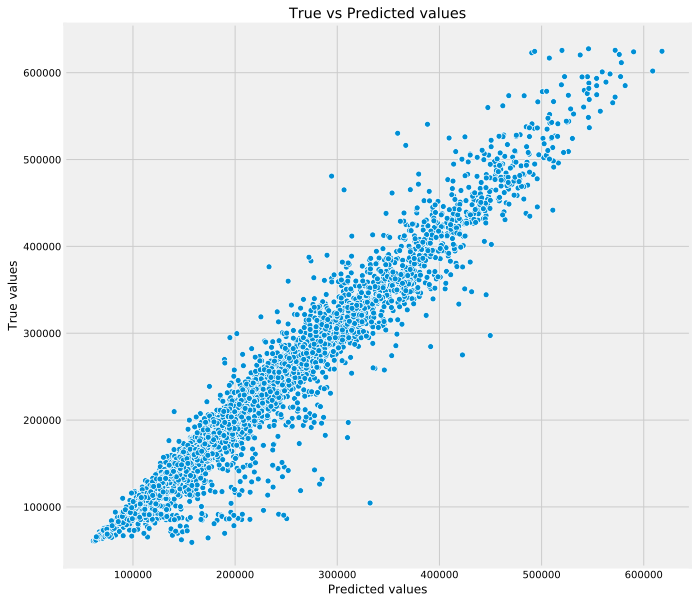

In [176]:
y_pred_train = rf_model.predict(X_train)

evaluate_preds(y_train.flatten(), y_pred_train.flatten())

R2:	0.6741


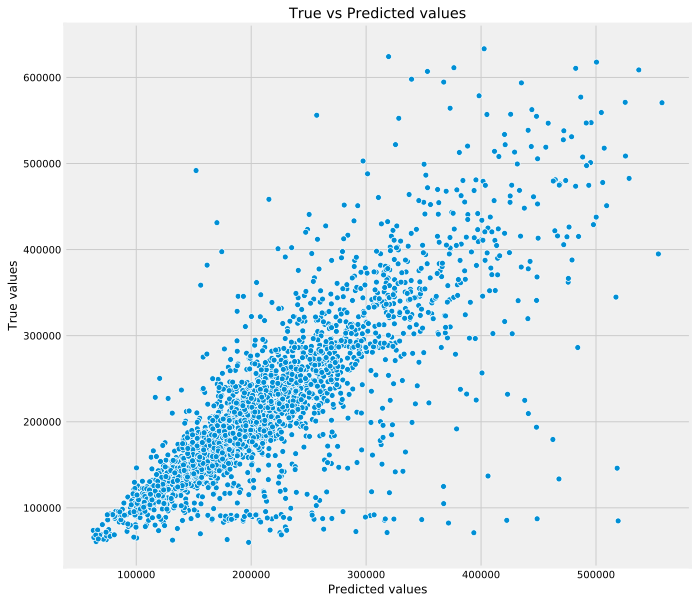

In [177]:
y_pred_valid = rf_model.predict(X_valid)

evaluate_preds(y_valid.flatten(), y_pred_valid.flatten())

### Настройка и оценка финальной модели

In [172]:
params = {'n_estimators':[ 100, 200, 300, 400], 
          'max_depth':[ 10, 18, 26, 34]}

gs = GridSearchCV(rf_model, params, scoring = 'r2', cv = 3, n_jobs = -1)
gs.fit(X, y)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=10, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [10, 18, 26, 34],
        

In [173]:
# лучшие параметры
gs.best_params_

{'max_depth': 26, 'n_estimators': 400}

In [178]:
final_model = RandomForestRegressor(n_estimators = 400, max_depth = 26, random_state = 42)
final_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=26,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=400,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

R2:	0.9631


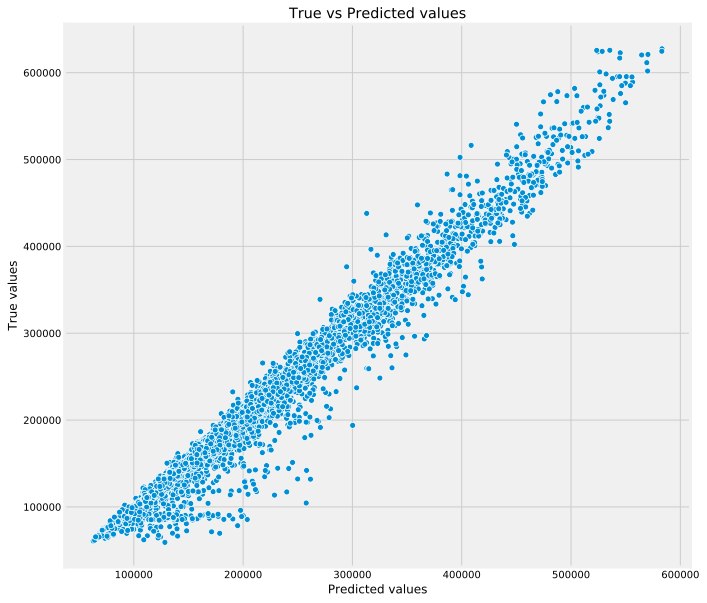

In [179]:
y_train_preds = final_model.predict(X_train)
evaluate_preds(y_train.flatten(), y_train_preds.flatten())

R2:	0.7103


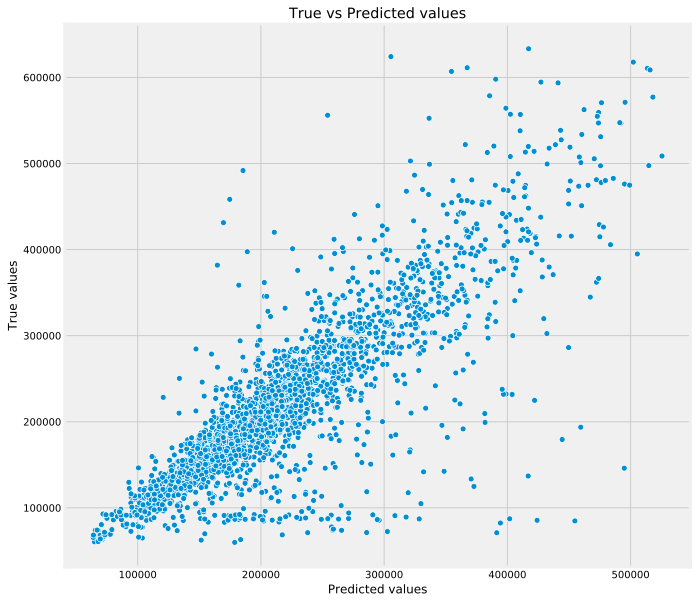

In [180]:
y_valid_preds = final_model.predict(X_valid)
evaluate_preds(y_valid.flatten(), y_valid_preds.flatten())

In [181]:
# обучим подобранную модель на всех тренировочных данных

final_model.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=26,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=400,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [182]:
# обработаем тестовые данные тем же спопосбом, что и данные на которых обучали модель

processed_data_test = data_prepare(data_test, dummy_features = None)

processed_data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
Id               5000 non-null object
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       5000 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null int64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null int64
Ecology_3        5000 non-null int64
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     5000 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null int64
dtypes: float64(6), int64(12), object(1)
memory usage: 742.3+ KB


In [183]:
processed_data_test.head()

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
0    725          58    2.0   49.882643   33.432782            6.0      6   
1  15856          74    2.0   69.263183   32.831652            1.0      6   
2   5480         190    1.0  135.978185   15.948246           12.0      2   
3  15664          47    2.0   73.046609   51.940842            9.0     22   
4  14275          27    1.0   47.527111   43.387569            1.0     17   

   HouseFloor  HouseYear  Ecology_1  Ecology_2  Ecology_3  Social_1  Social_2  \
0          14       1972   0.310199          0          0        11      2748   
1           6       1977   0.075779          0          0         6      1437   
2           5       1909   0.000000          0          0        30      7538   
3          22       2007   0.101872          0          0        23      4583   
4          17       2017   0.072158          0          0         2       629   

   Social_3  Healthcare_1  Helthcare_2  Shops_1  Shops_2  
0         1         900.0            0        0        0  
1         3         900.0            0        2        0  
2        87        4702.0            5        5        0  
3         3         900.0            3        3        0  
4         1         900.0            0        0        1

In [184]:
processed_data_test.describe()

DistrictId       Rooms       Square   LifeSquare  KitchenSquare  \
count  5000.000000  5000.00000  5000.000000  5000.000000    5000.000000   
mean     51.279200     1.90780    56.682012    35.148772       6.183200   
std      44.179466     0.81008    19.378063    16.571943       2.763035   
min       0.000000     1.00000    13.785426     0.333490       1.000000   
25%      21.000000     1.00000    42.025477    22.381859       6.000000   
50%      37.000000     2.00000    53.006491    32.831652       6.000000   
75%      77.000000     2.00000    66.438549    44.389901       8.000000   
max     212.000000     6.00000   303.071094   303.071094      22.000000   

             Floor   HouseFloor    HouseYear    Ecology_1    Ecology_2  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean      8.632000    13.377000  1984.392600     0.119874     0.009600   
std       5.483228     6.113489    18.573149     0.120070     0.097518   
min       1.000000     1.000000  1908.000000     0.000000     0.000000   
25%       4.000000     9.000000  1973.000000     0.019509     0.000000   
50%       7.000000    14.000000  1977.000000     0.072158     0.000000   
75%      12.000000    17.000000  2000.000000     0.195781     0.000000   
max      78.000000    78.000000  2020.000000     0.521867     1.000000   

         Ecology_3     Social_1      Social_2     Social_3  Healthcare_1  \
count  5000.000000  5000.000000   5000.000000  5000.000000   5000.000000   
mean      0.029800    24.933800   5406.900000     8.262600   1029.396400   
std       0.170052    17.532202   4026.614773    23.863762    766.595258   
min       0.000000     0.000000    168.000000     0.000000      0.000000   
25%       0.000000     6.000000   1564.000000     0.000000    810.000000   
50%       0.000000    25.000000   5285.000000     2.000000    900.000000   
75%       0.000000    36.000000   7287.000000     5.000000    990.000000   
max       1.000000    74.000000  19083.000000   141.000000   4849.000000   

       Helthcare_2      Shops_1      Shops_2  
count   5000.00000  5000.000000  5000.000000  
mean       1.31940     4.242800     0.082400  
std        1.47994     4.777365     0.275001  
min        0.00000     0.000000     0.000000  
25%        0.00000     1.000000     0.000000  
50%        1.00000     3.000000     0.000000  
75%        2.00000     6.000000     0.000000  
max        6.00000    23.000000     1.000000

In [185]:
data_test_pred = final_model.predict(processed_data_test.drop(labels = ['Id'], axis = 1))

processed_data_test['Price'] = data_test_pred

In [186]:
processed_data_test.head()

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
0    725          58    2.0   49.882643   33.432782            6.0      6   
1  15856          74    2.0   69.263183   32.831652            1.0      6   
2   5480         190    1.0  135.978185   15.948246           12.0      2   
3  15664          47    2.0   73.046609   51.940842            9.0     22   
4  14275          27    1.0   47.527111   43.387569            1.0     17   

   HouseFloor  HouseYear  Ecology_1  Ecology_2  Ecology_3  Social_1  Social_2  \
0          14       1972   0.310199          0          0        11      2748   
1           6       1977   0.075779          0          0         6      1437   
2           5       1909   0.000000          0          0        30      7538   
3          22       2007   0.101872          0          0        23      4583   
4          17       2017   0.072158          0          0         2       629   

   Social_3  Healthcare_1  Helthcare_2  Shops_1  Shops_2          Price  
0         1         900.0            0        0        0  162294.769171  
1         3         900.0            0        2        0  222752.970028  
2        87        4702.0            5        5        0  363742.002047  
3         3         900.0            3        3        0  349683.384178  
4         1         900.0            0        0        1  145311.783716

In [187]:
processed_data_test[['Id', 'Price']].to_csv('SVolkov_predictions.csv', sep = ',', index = None)